# Test Graph Distribution

In [2]:
import pandas as pd

# X_test = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/Test_shap_feature_selection.csv', encoding="ISO-8859–1", dtype = str)
X_test = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/Test_shap_feature_selection5000_x_train.csv', encoding="ISO-8859–1", dtype = str)
X_test = X_test.apply(pd.to_numeric)
X_test = X_test.astype(float)

print(X_test.columns)
print(len(X_test))
print(len(X_test.columns))

Index([' Flow Duration', ' Active Std', ' act_data_pkt_fwd', ' Bwd Packets/s',
       ' Max Packet Length', ' RST Flag Count', ' Fwd IAT Mean',
       ' Fwd URG Flags', ' ACK Flag Count', ' min_seg_size_forward',
       'Fwd PSH Flags', ' Packet Length Variance', ' Bwd IAT Std',
       ' Fwd Packet Length Max', ' URG Flag Count', 'Fwd Avg Bytes/Bulk',
       ' Bwd IAT Mean', ' Packet Length Mean', ' Flow IAT Max', ' Fwd IAT Std',
       ' Flow IAT Std', 'Idle Mean', ' Fwd Header Length.1', ' Idle Std',
       ' PSH Flag Count', 'Fwd Packets/s', 'Total Length of Fwd Packets',
       'Fwd IAT Total', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean',
       'Subflow Fwd Packets', ' Total Length of Bwd Packets',
       ' Bwd Packet Length Min', 'Bwd Avg Bulk Rate', 'Bwd IAT Total',
       ' Subflow Fwd Bytes', ' Bwd Avg Packets/Bulk', ' Destination IP',
       ' Packet Length Std', ' Bwd Packet Length Mean', ' Idle Min',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Packet 

In [3]:
import networkx as nx
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

X1_test = X_test

print("nb Test instances : ", len(X1_test.values))

encoder1 = ce.TargetEncoder(cols=[' Protocol',  'Fwd PSH Flags', ' Fwd URG Flags', ' Bwd PSH Flags', ' Bwd URG Flags'])
encoder1.fit(X1_test, X1_test['label'])
X1_test = encoder1.transform(X1_test)
# X1_test = encoder1.transform(X1_test)

scaler1 = StandardScaler()
cols_to_norm1 = list(set(list(X1_test.iloc[:, :].columns )) - set(list(['label', ' Source IP', ' Destination IP'])) )
X1_test[cols_to_norm1] = scaler1.fit_transform(X1_test[cols_to_norm1])
# X1_test[cols_to_norm1] = scaler1.transform(X1_test[cols_to_norm1])

X1_test['h'] = X1_test[ cols_to_norm1 ].values.tolist()
X1_test.drop(columns = cols_to_norm1, inplace = True)

# Then we need to Swap {label, h} Columns to have the {Source IP, Destination IP, h, label} representation
columns_titles = [' Source IP', ' Destination IP', 'h', 'label']
X1_test = X1_test.reindex(columns=columns_titles)

G1_test = nx.from_pandas_edgelist(X1_test, " Source IP", " Destination IP", ['h','label'],create_using=nx.MultiGraph())

print(G1_test)
print("nb connected component =", len(list(nx.connected_components(G1_test))))

nb Test instances :  5000
MultiGraph with 6035 nodes and 5000 edges
nb connected component = 1142


In [4]:
print(len(list(nx.connected_components(G1_test))[0]))

data_bar = dict()
for i, x in enumerate(list(nx.connected_components(G1_test))):
    data_bar[f'{i}'] = len(x)

print(len(data_bar))
data_bar = dict(sorted(data_bar.items(), key=lambda x:x[1], reverse=True))

2083
1142


## CC Size Frequency

In [5]:
from itertools import islice
import collections

cc_frequency = dict(collections.Counter(list(data_bar.values())))
cc_frequency = dict(sorted(cc_frequency.items(), key=lambda x:x[0], reverse=True))
print(cc_frequency)

{2083: 1, 755: 1, 329: 1, 56: 1, 24: 1, 22: 1, 21: 1, 18: 2, 16: 2, 14: 2, 13: 1, 11: 1, 10: 3, 9: 4, 8: 5, 7: 4, 6: 8, 5: 23, 4: 24, 3: 120, 2: 936}


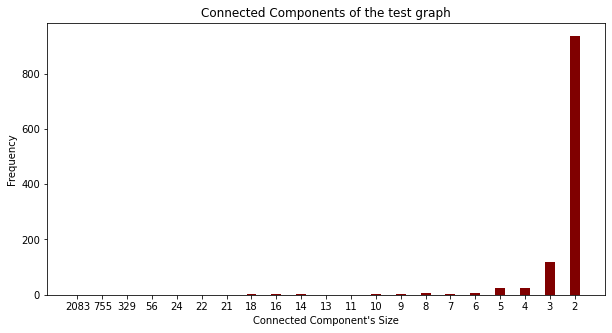

In [6]:
import numpy as np
import matplotlib.pyplot as plt

cc_size = list(map(str, list(cc_frequency.keys()))) 
cc_freq = list(cc_frequency.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cc_size, cc_freq, color ='maroon', width = 0.4)
 
plt.xlabel("Connected Component's Size")
plt.ylabel("Frequency")
plt.title("Connected Components of the test graph")
plt.show()

## Node Degree Frequency

In [8]:
node_bar = dict(sorted(dict(G1_test.degree).items(), key=lambda x:x[1], reverse=True))

from itertools import islice
import collections

node_degree_frequency = dict(collections.Counter(list(node_bar.values())))
node_degree_frequency = dict(sorted(node_degree_frequency.items(), key=lambda x:x[0], reverse=True))
print(node_degree_frequency)

{1787: 1, 748: 1, 349: 1, 56: 1, 39: 1, 21: 1, 20: 1, 17: 1, 15: 1, 13: 2, 11: 1, 10: 1, 9: 3, 8: 7, 7: 13, 6: 12, 5: 17, 4: 42, 3: 62, 2: 350, 1: 5516}


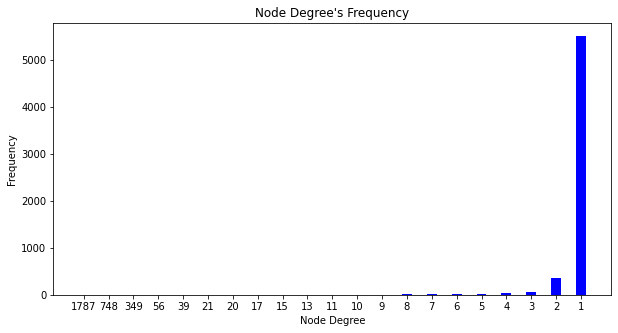

In [9]:
import numpy as np
import matplotlib.pyplot as plt

node_degree = list(map(str, list(node_degree_frequency.keys()))) 
node_degree_freq = list(node_degree_frequency.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(node_degree, node_degree_freq, color ='blue', width = 0.4)
 
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.title("Node Degree's Frequency")
plt.show()

## SHAP Final Explaination

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


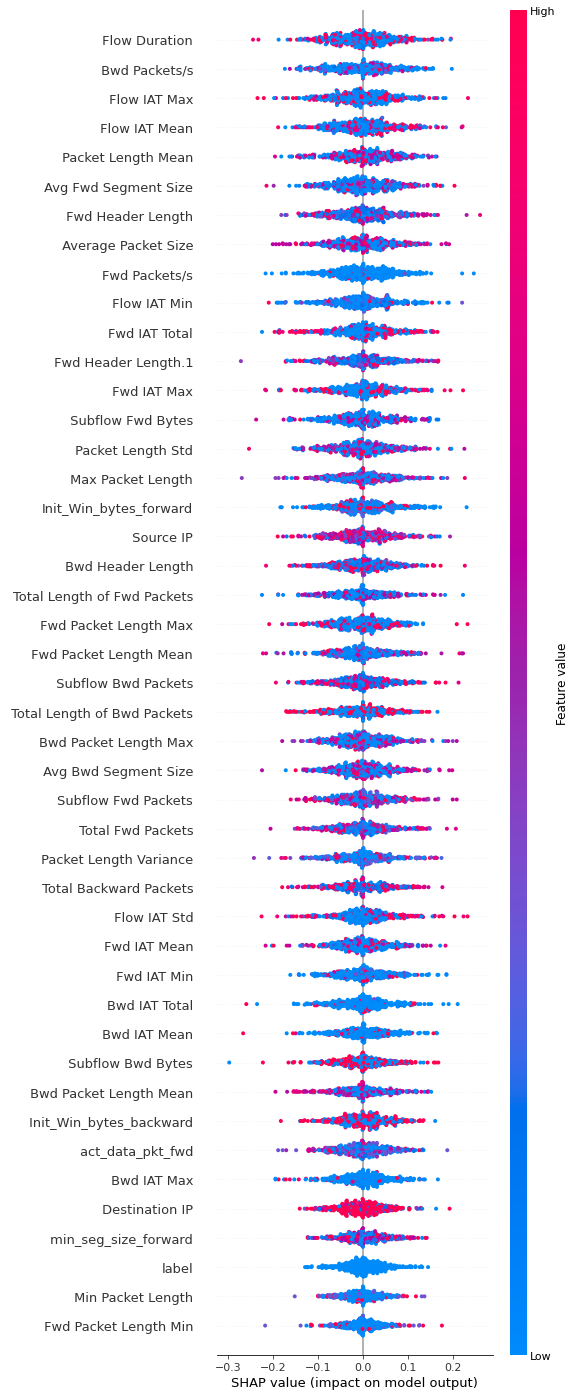

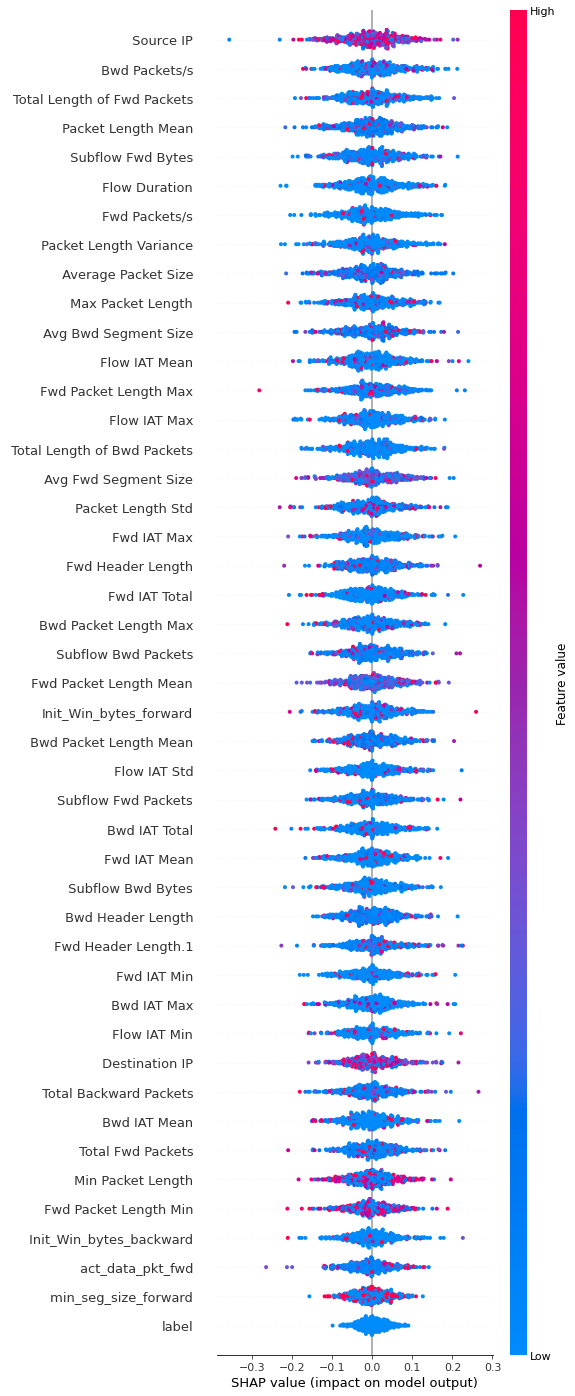

In [1]:
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import numpy as np


X_test = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/Test_shap_feature_selection5000_x_train_final.csv', encoding="ISO-8859–1", dtype = str)
X_test = X_test.apply(pd.to_numeric)
X_test = X_test.astype(float)


# print(X_test.dtypes.to_string())


# filename_expl = './src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_explainer.sav'
filename = '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_shapvalues_shap_feature_selection5000_x_train_final.sav'

# load_explainer = pickle.load(open(filename_expl, 'rb'))
# print(load_explainer)

label_column = X_test["label"]
attack_indx = []
benign_indx = []
for i, x in enumerate(label_column):
    if (x == 1.0):
        attack_indx.append(i)
    elif (x == 0.0):
        benign_indx.append(i)

load_shap_values_tree = pickle.load(open(filename, 'rb'))

# cols = list(set(list(X_test.columns)) - set(list(['label'])))
# X_test = X_test[cols]

# TreeExplainer
shap.summary_plot(load_shap_values_tree[attack_indx], feature_names = X_test.columns, max_display=X_test.shape[1])
shap.summary_plot(load_shap_values_tree[benign_indx], feature_names = X_test.columns, max_display=X_test.shape[1])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


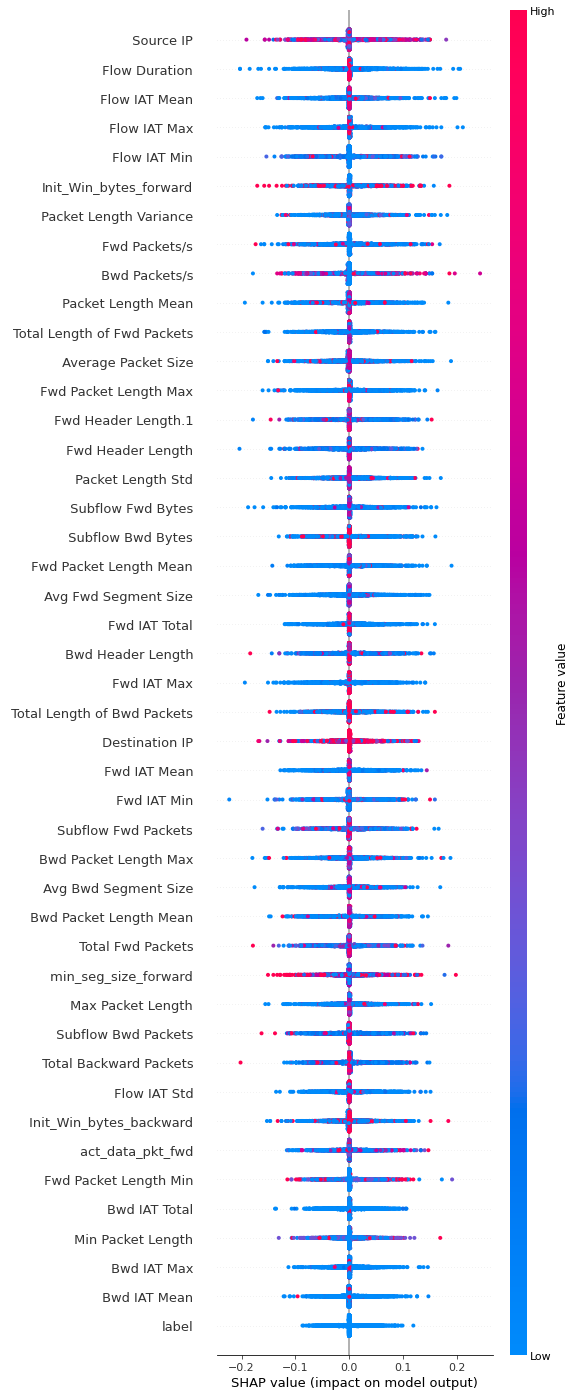

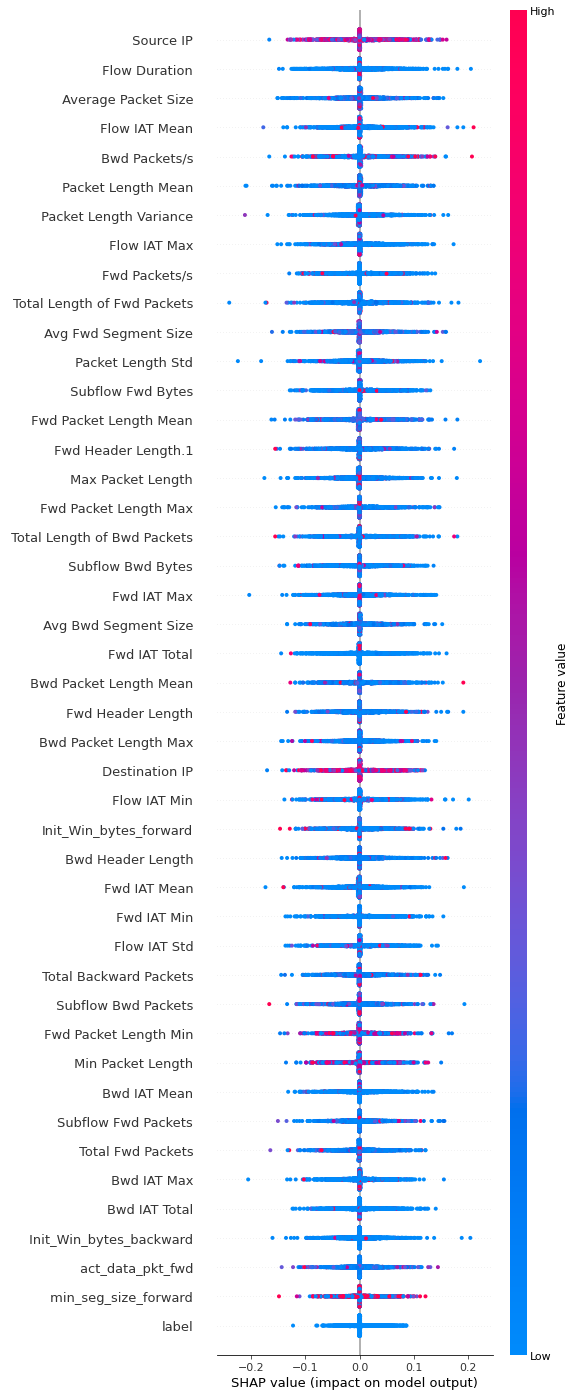

In [2]:
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import numpy as np


X_test = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/Test_shap_feature_selection_5000edge_50percentfeatures.csv', encoding="ISO-8859–1", dtype = str)
X_test = X_test.apply(pd.to_numeric)
X_test = X_test.astype(float)


# print(X_test.dtypes.to_string())


# filename_expl = './src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_explainer.sav'
filename = '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_shapvalues_shap_feature_selection_5000edge_50percentfeatures.sav'

# load_explainer = pickle.load(open(filename_expl, 'rb'))
# print(load_explainer)

label_column = X_test["label"]
attack_indx = []
benign_indx = []
for i, x in enumerate(label_column):
    if (x == 1.0):
        attack_indx.append(i)
    elif (x == 0.0):
        benign_indx.append(i)

load_shap_values_tree = pickle.load(open(filename, 'rb'))

# cols = list(set(list(X_test.columns)) - set(list(['label'])))
# X_test = X_test[cols]

# TreeExplainer
shap.summary_plot(load_shap_values_tree[attack_indx], feature_names = X_test.columns, max_display=X_test.shape[1])
shap.summary_plot(load_shap_values_tree[benign_indx], feature_names = X_test.columns, max_display=X_test.shape[1])